# ELECTION_SCENARIO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


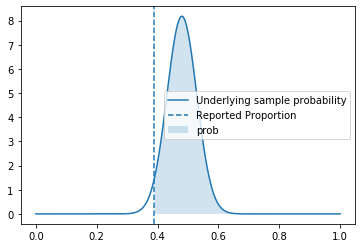

In [6]:
sigma = np.sqrt(0.39 * 0.61 / 100)
reported = 0.39
sample = 0.48

xs = np.linspace(0, 1, 500)
ps = norm.pdf(xs, sample, sigma)
plt.plot(xs, ps, label="Underlying sample probability")
plt.axvline(reported, ls="--", label="Reported Proportion")
plt.fill_between(xs, ps, 0, alpha=0.2, where=xs>=reported, label="prob")
plt.legend();

In [7]:
prob_more  = norm.sf(reported ,sample,sigma)
print(f"There is a {100 * prob_more:.1f}% chance that Candidate A would have received more votes")

There is a 96.7% chance that Candidate A would have received more votes


In [10]:
z_score = (sample - reported )/sigma 
z_score_needed_for_significance = norm.ppf(0.95)
print(f"{z_score:.3f} is larger than {z_score_needed_for_significance:.3f}, so we are significant")
print(f"Have p-value {norm.sf(sample, reported, sigma):.3f}")

1.845 is larger than 1.645, so we are significant
Have p-value 0.033


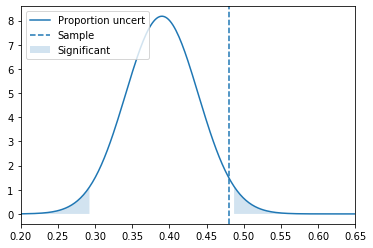

In [11]:
xs = np.linspace(0, 1, 500)
ps = norm.pdf(xs, reported, sigma)

plt.plot(xs, ps, label="Proportion uncert")
plt.axvline(sample, ls="--", label="Sample")
limits = norm.ppf([0.025, 0.975], reported, sigma)
plt.fill_between(xs, ps, 0, alpha=0.2, where=(xs<limits[0])|(xs>limits[1]), label="Significant")
plt.legend(loc=2)
plt.xlim(0.2, 0.65);

In [12]:
# Using z-scores
z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.975)
print(f"{z_score:.3f} is less than {z_score_needed_for_significance:.3f}, so we aren't significant")

# Using p-values
p_value_two_tailed = 2 * norm.sf(z_score)
print(f"{p_value_two_tailed:.3f} is > 0.05")

1.845 is less than 1.960, so we aren't significant
0.065 is > 0.05
